In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# we want to cluster circutes and las that are similar to each other so a driver could make his position better by pitting at the right time

In [2]:
pit_stop = pd.read_csv("../Scraping_for_clustering/f1db_csv/pit_stops.csv")
lap_time = pd.read_csv("../Scraping_for_clustering/f1db_csv/lap_times.csv")

In [3]:
pit_stop.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [4]:
lap_time.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [5]:
merged_df = pd.merge(pit_stop, lap_time, on=["raceId","lap","driverId"])

In [6]:
merged_df

,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,position,time_y,milliseconds_y
0,841,153,1,1,17:05:23,26.898,26898,21,2:13.879,133879
1,841,30,1,1,17:05:52,25.021,25021,22,2:41.428,161428
2,841,17,1,11,17:20:48,23.426,23426,7,1:54.995,114995
3,841,4,1,12,17:22:34,23.251,23251,12,1:52.624,112624
4,841,13,1,13,17:24:10,23.842,23842,11,1:54.060,114060
...,...,...,...,...,...,...,...,...,...,...
10047,1109,832,2,44,16:05:56,22.051,22051,6,1:27.670,87670
10048,1109,852,2,44,16:06:33,21.181,21181,11,1:29.888,89888
10049,1109,847,2,46,16:08:49,21.675,21675,6,1:25.421,85421
10050,1109,1,2,49,16:12:41,21.728,21728,3,1:27.017,87017


In [7]:
for _ in merged_df.columns:
    print(merged_df[_].unique())

[ 841  842  843  844  845  846  847  848  849  850  851  852  853  854
  855  856  857  858  859  860  861  862  863  864  865  866  867  868
  869  870  871  872  873  874  875  876  877  878  879  880  881  882
  883  884  885  886  887  888  890  891  892  893  894  895  896  897
  898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  917  918  926  927  928  929  930  931  932
  933  934  936  937  938  939  940  941  942  943  944  945  948  949
  950  951  952  953  954  955  956  957  958  959  960  961  962  963
  964  965  966  967  968  969  970  971  972  973  974  975  976  977
  978  979  980  981  982  983  984  985  986  987  988  989  990  991
  992  993  994  995  996  997  998  999 1000 1001 1002 1003 1004 1005
 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019
 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033
 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047
 1052 

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   raceId          10052 non-null  int64 
 1   driverId        10052 non-null  int64 
 2   stop            10052 non-null  int64 
 3   lap             10052 non-null  int64 
 4   time_x          10052 non-null  object
 5   duration        10052 non-null  object
 6   milliseconds_x  10052 non-null  int64 
 7   position        10052 non-null  int64 
 8   time_y          10052 non-null  object
 9   milliseconds_y  10052 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 785.4+ KB


In [9]:
merged_df.drop(['time_x','time_y','duration'], axis=1, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   raceId          10052 non-null  int64
 1   driverId        10052 non-null  int64
 2   stop            10052 non-null  int64
 3   lap             10052 non-null  int64
 4   milliseconds_x  10052 non-null  int64
 5   position        10052 non-null  int64
 6   milliseconds_y  10052 non-null  int64
dtypes: int64(7)
memory usage: 549.8 KB


In [10]:
merged_df.rename(columns={'milliseconds_x':'pit_stop_time','milliseconds_y':'total_lap_time'}, inplace=True)

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   raceId          10052 non-null  int64
 1   driverId        10052 non-null  int64
 2   stop            10052 non-null  int64
 3   lap             10052 non-null  int64
 4   pit_stop_time   10052 non-null  int64
 5   position        10052 non-null  int64
 6   total_lap_time  10052 non-null  int64
dtypes: int64(7)
memory usage: 549.8 KB


In [12]:
merged_df.head()

,raceId,driverId,stop,lap,pit_stop_time,position,total_lap_time
0,841,153,1,1,26898,21,133879
1,841,30,1,1,25021,22,161428
2,841,17,1,11,23426,7,114995
3,841,4,1,12,23251,12,112624
4,841,13,1,13,23842,11,114060


In [ ]:
sns.pairplot(merged_df)

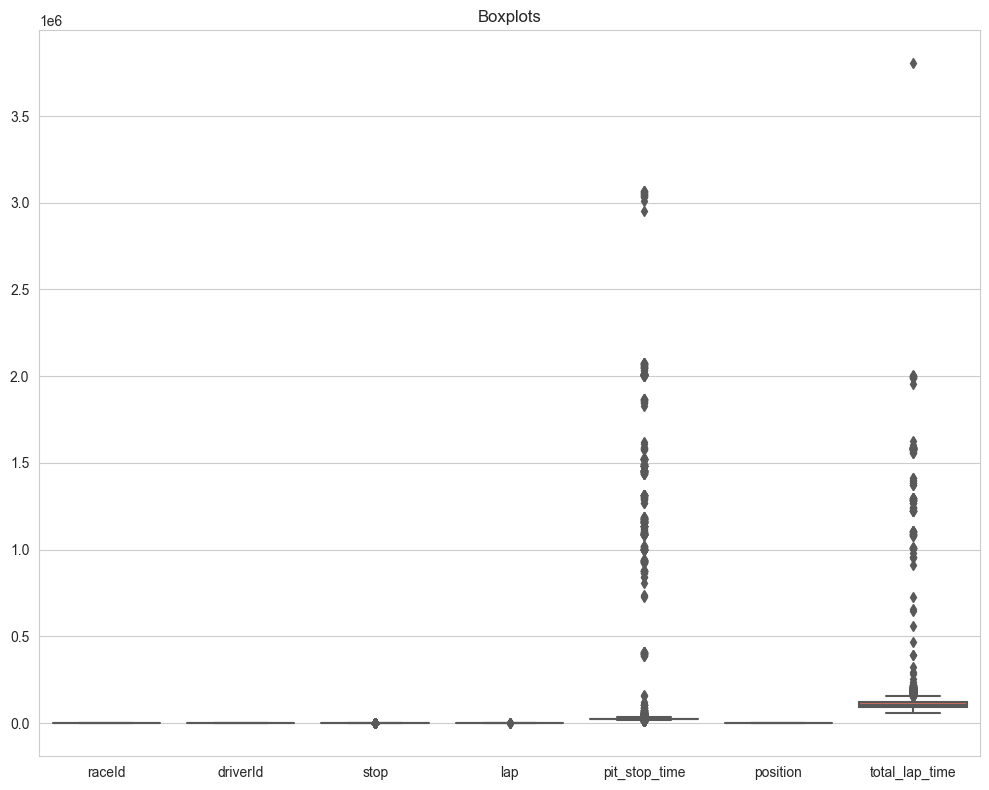

In [15]:
plt.figure(figsize=(10,8)) 
sns.boxplot(data=merged_df, palette='coolwarm')
plt.title('Boxplots')
plt.tight_layout() 
plt.show()

# we can see that there are a lot of different types of distributions but we cant see them well so we will use the log funcition to see them better

In [16]:
log_data = np.log(merged_df)

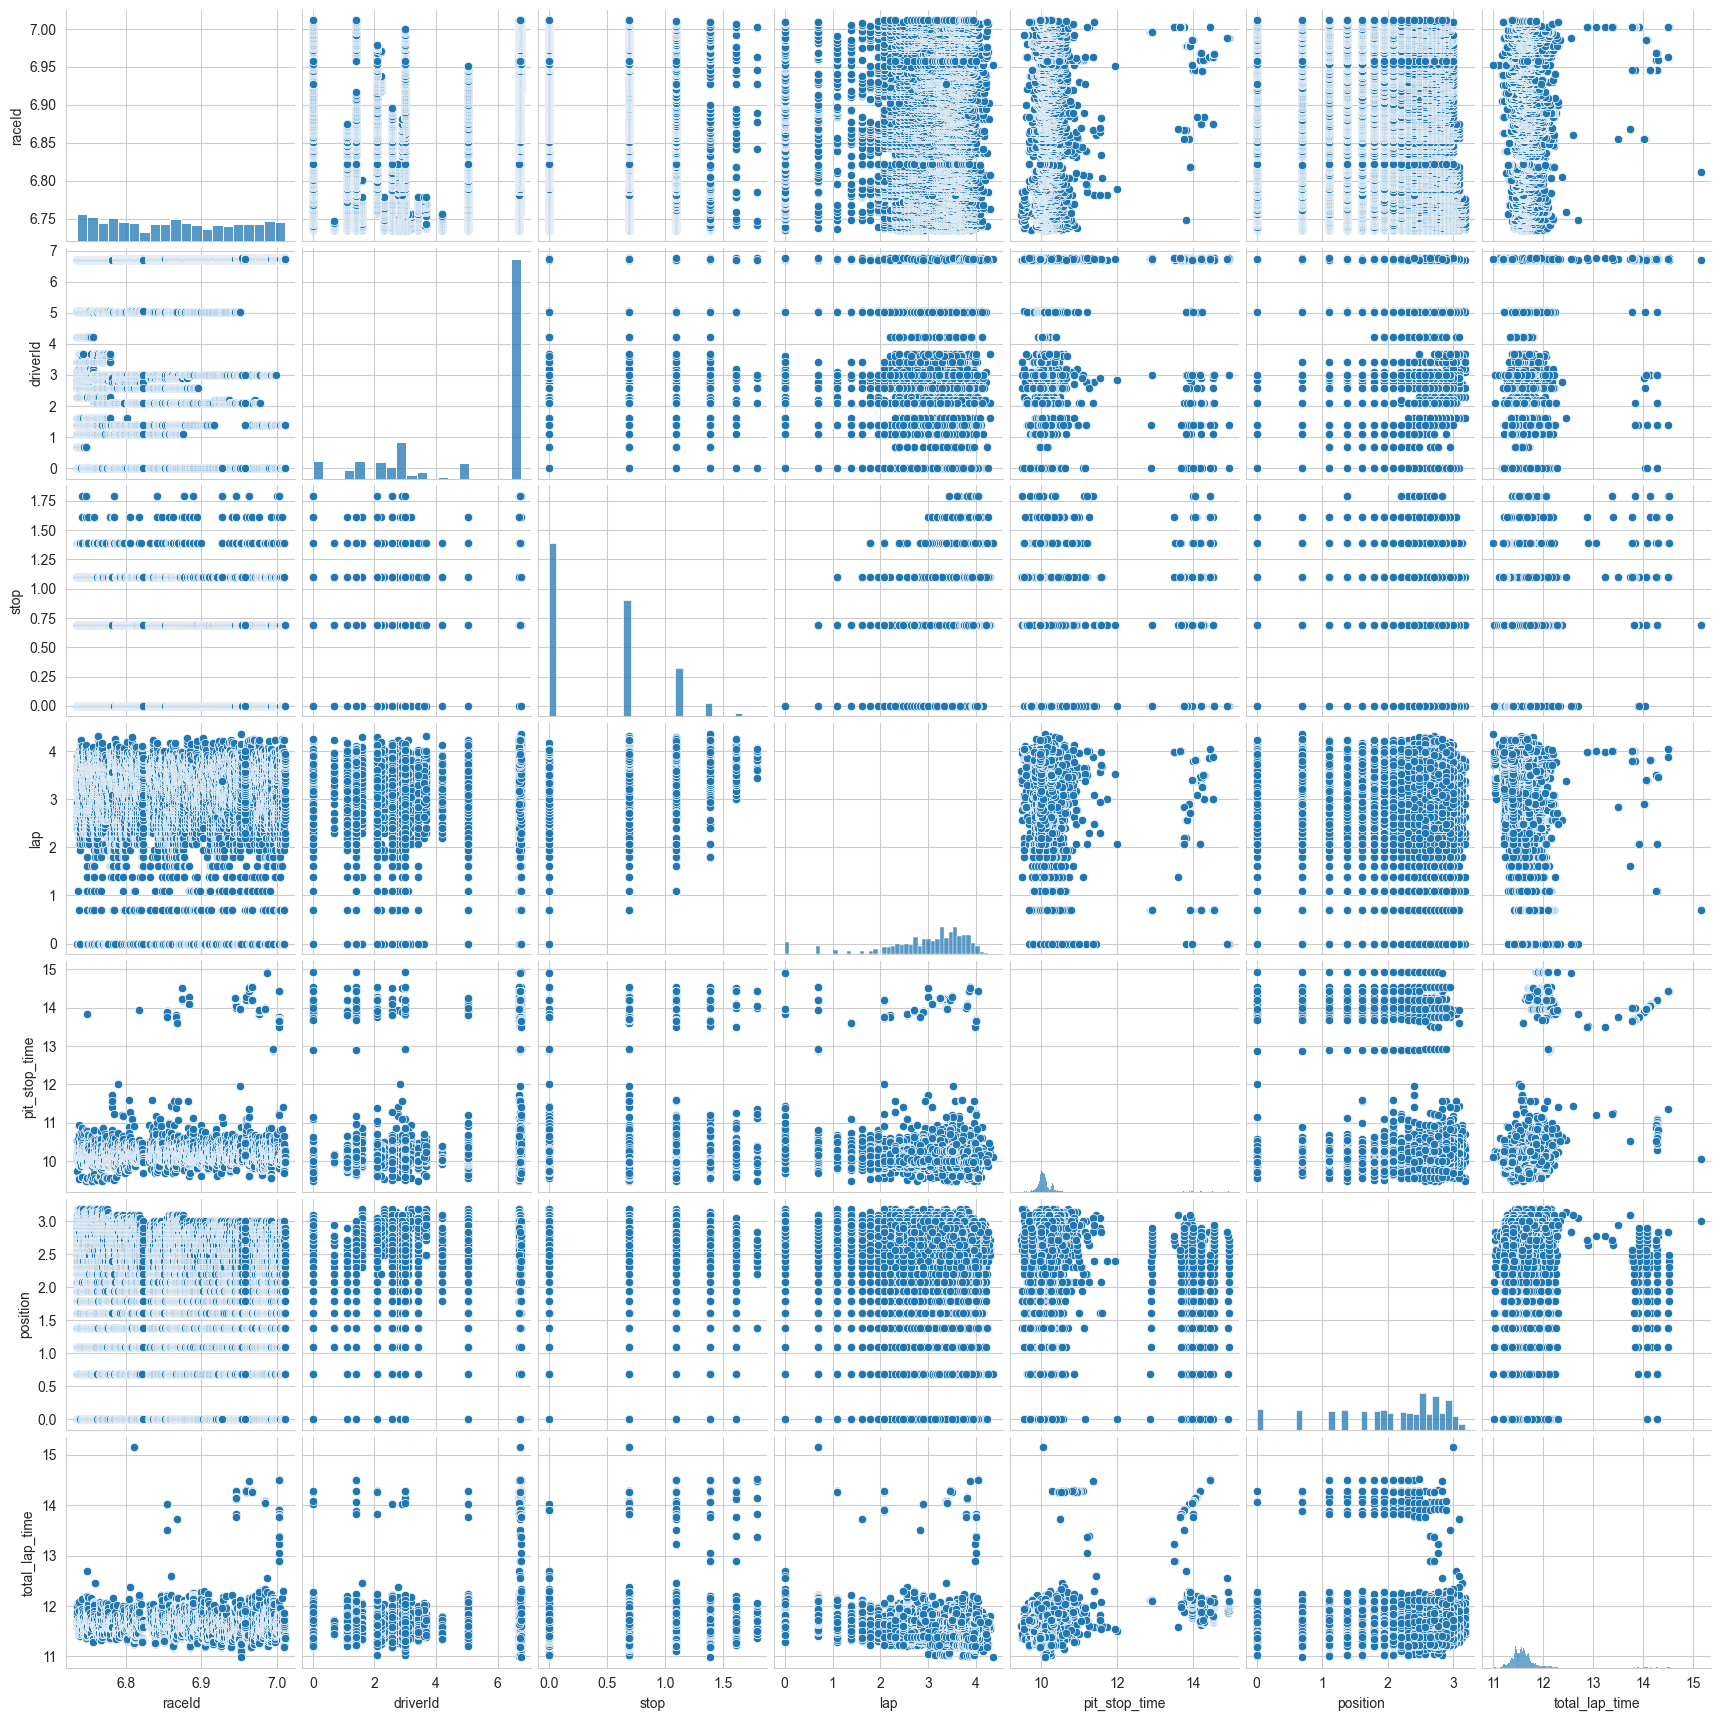

In [ ]:
sns.pairplot(log_data)

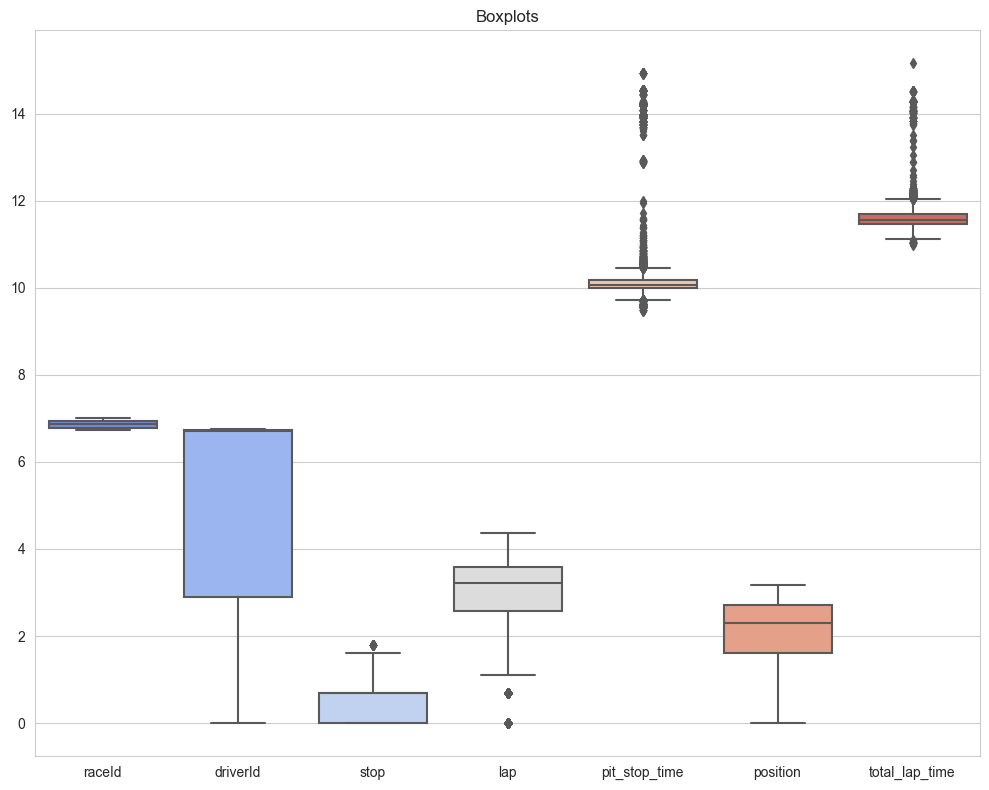

In [17]:
plt.figure(figsize=(10,8)) 
sns.boxplot(data=log_data, palette='coolwarm')
plt.title('Boxplots')
plt.tight_layout() 
plt.show()

# outliers for each feature

In [18]:
for feature in log_data.keys():
    q1 = log_data[feature].quantile(0.25)
    q3 = merged_df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(f'Feature: {feature}')
    print(f'Lower bound: {lower_bound}')
    print(f'Upper bound: {upper_bound}')
    print('\n')

Feature: raceId
Lower bound: -1532.5303875442262
Upper bound: 2572.3182325265357


Feature: driverId
Lower bound: -1239.2740706052593
Upper bound: 2073.1644423631556


Feature: stop
Lower bound: -3.0
Upper bound: 5.0


Feature: lap
Lower bound: -47.587626606346156
Upper bound: 86.15257596380769


Feature: pit_stop_time
Lower bound: -39322.26348213523
Upper bound: 65563.75808928114


Feature: position
Lower bound: -18.476405218914753
Upper bound: 35.08584313134885


Feature: total_lap_time
Lower bound: -178694.487613344
Upper bound: 297854.6925680064


In [19]:
all_outliers = np.array([])
for feature in log_data.keys():
    print('Outliers of feature - '+feature + " :")
    Q1 = np.percentile(log_data[feature],25)
    Q3 = np.percentile(log_data[feature],75)
    step = 1.5*(Q3-Q1)
    outlier_pts = log_data[~((log_data[feature] >=Q1-step) & (log_data[feature] <=Q3+step))]
    all_outliers = np.append(all_outliers,outlier_pts.index.values)
    print(outlier_pts)

Outliers of feature - raceId :
Empty DataFrame
Columns: [raceId, driverId, stop, lap, pit_stop_time, position, total_lap_time]
Index: []
Outliers of feature - driverId :
Empty DataFrame
Columns: [raceId, driverId, stop, lap, pit_stop_time, position, total_lap_time]
Index: []
Outliers of feature - stop :
        raceId  driverId      stop       lap  pit_stop_time  position  \
420   6.741701  2.890372  1.791759  3.931826      10.074959  2.302585   
693   6.746412  0.000000  1.791759  4.025352       9.485925  1.386294   
2387  6.784457  6.693324  1.791759  3.970292       9.919066  2.708050   
4219  6.841615  0.000000  1.791759  3.988984       9.715892  2.484907   
4222  6.841615  6.700731  1.791759  4.060443       9.707838  2.484907   
5657  6.877296  2.564949  1.791759  3.871201      10.022026  2.564949   
5658  6.877296  6.703188  1.791759  3.891820      10.042336  2.197225   
6064  6.889591  6.719013  1.791759  3.433987      10.311184  2.639057   
6065  6.889591  2.564949  1.791759  3.

In [20]:
print(all_outliers)

[ 420.  693. 2387. ... 9772. 9849. 9909.]


In [21]:
len(all_outliers)

1887

In [22]:
all_outliers2,indices = np.unique(all_outliers,return_inverse=True)
print(all_outliers2, '\n' ,len(all_outliers2))

[0.0000e+00 1.0000e+00 2.4000e+01 ... 9.9500e+03 9.9920e+03 1.0015e+04] 
 1288


In [23]:
print(indices, '\n', len(indices))

[  26   31  144 ... 1254 1260 1263] 
 1887


In [24]:
counts = np.bincount(indices)
counts

array([1, 1, 1, ..., 2, 1, 1])

In [25]:
outliers = all_outliers2[counts>1]

In [26]:
outliers

array([ 187.,  693.,  696.,  749.,  751.,  783.,  794.,  849.,  970.,
       1180., 1238., 1580., 1698., 1699., 1794., 1795., 1824., 1939.,
       2243., 2389., 2390., 3045., 3046., 3114., 3351., 3596., 3597.,
       3598., 3599., 3600., 3601., 3602., 3603., 3604., 3605., 3606.,
       3607., 3608., 3609., 3610., 3611., 3612., 3613., 3614., 3615.,
       3616., 3617., 3786., 3844., 4021., 4022., 4096., 4219., 4222.,
       4330., 4373., 4374., 4392., 4394., 4395., 4418., 4526., 4568.,
       4588., 4589., 4590., 4591., 4592., 4593., 4594., 4595., 4596.,
       4597., 4598., 4599., 4600., 4601., 4602., 4603., 4604., 4605.,
       4666., 4669., 4732., 4733., 4736., 4805., 4806., 5150., 5160.,
       5161., 5162., 5163., 5164., 5165., 5166., 5167., 5168., 5169.,
       5170., 5171., 5172., 5173., 5174., 5175., 5210., 5243., 5244.,
       5245., 5246., 5247., 5248., 5249., 5250., 5251., 5252., 5253.,
       5254., 5255., 5256., 5711., 5776., 5795., 5796., 5836., 5838.,
       5839., 5840.,

In [27]:
good_data = log_data.drop(outliers)

In [28]:
len(good_data)

9559

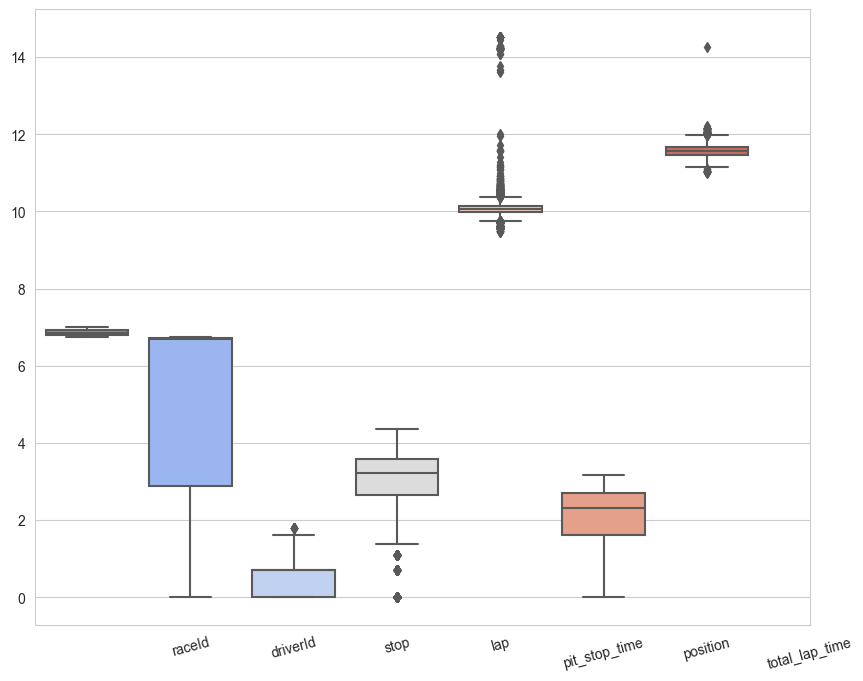

In [29]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(good_data,palette='coolwarm')
plt.xticks(range(1,8),good_data.columns,rotation=15)
plt.show()

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(good_data)
pca_samples = pca.transform(good_data)

In [31]:
pca_samples

array([[-1.73723804e-01,  3.16073642e+00,  3.54225366e-02,
         2.22871294e-01,  5.78115558e-01],
       [ 1.43505843e+00,  3.28871039e+00, -1.99179885e-01,
         1.77547390e-01,  5.88652695e-01],
       [ 2.18871541e+00,  8.01584818e-01,  1.27232354e-01,
        -7.03633428e-02, -1.72674782e-01],
       ...,
       [-1.63803868e+00, -9.93182007e-01,  1.81558493e-01,
        -1.57529673e-01, -3.64348977e-03],
       [ 5.13544261e+00, -8.65336139e-01,  1.57327305e-02,
        -1.19219329e-01, -6.51931947e-02],
       [-1.37937246e+00, -1.68310668e+00,  1.80883319e+00,
        -9.17722622e-02,  1.50384719e-01]])

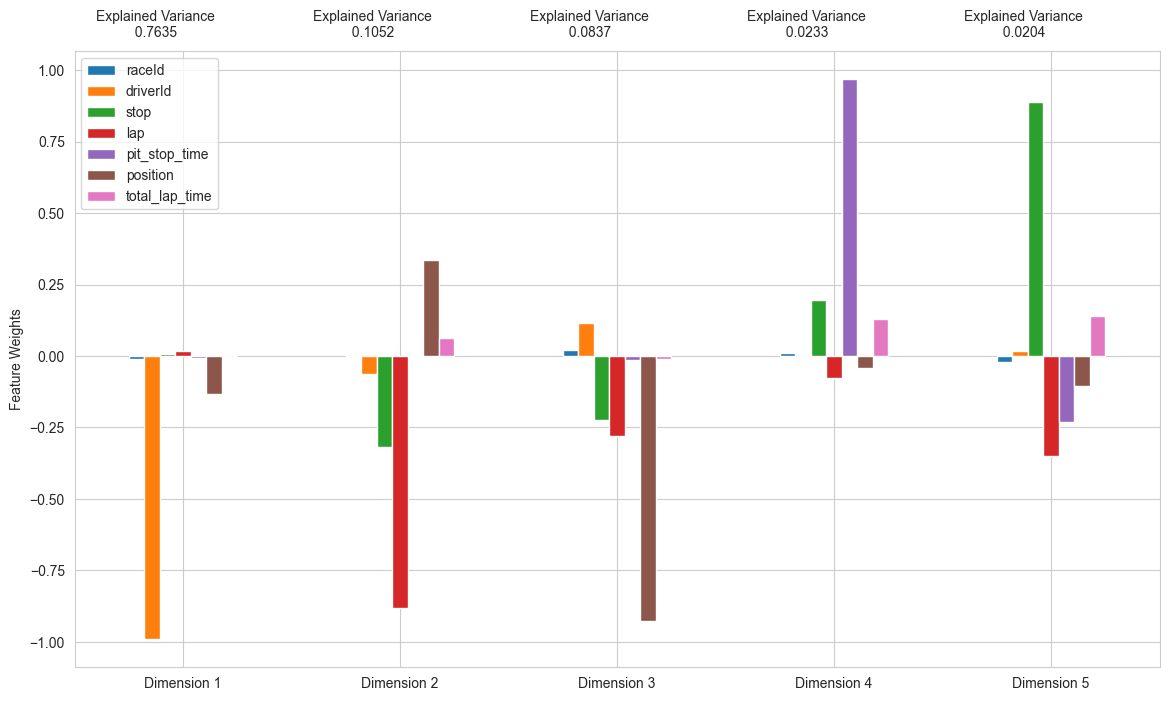

In [32]:
import visuals as vs
pca_results = vs.pca_results(good_data,pca)

# we can see that the major of the dimenstions are based on who is the driver, what was his position, what lap he was and how many stops he has done

In [33]:
reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_data)
reduced_data = pd.DataFrame(reduced_data,columns=['Dimension 1','Dimension 2','Dimension 3','Dimension 4','Dimension 5'])

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

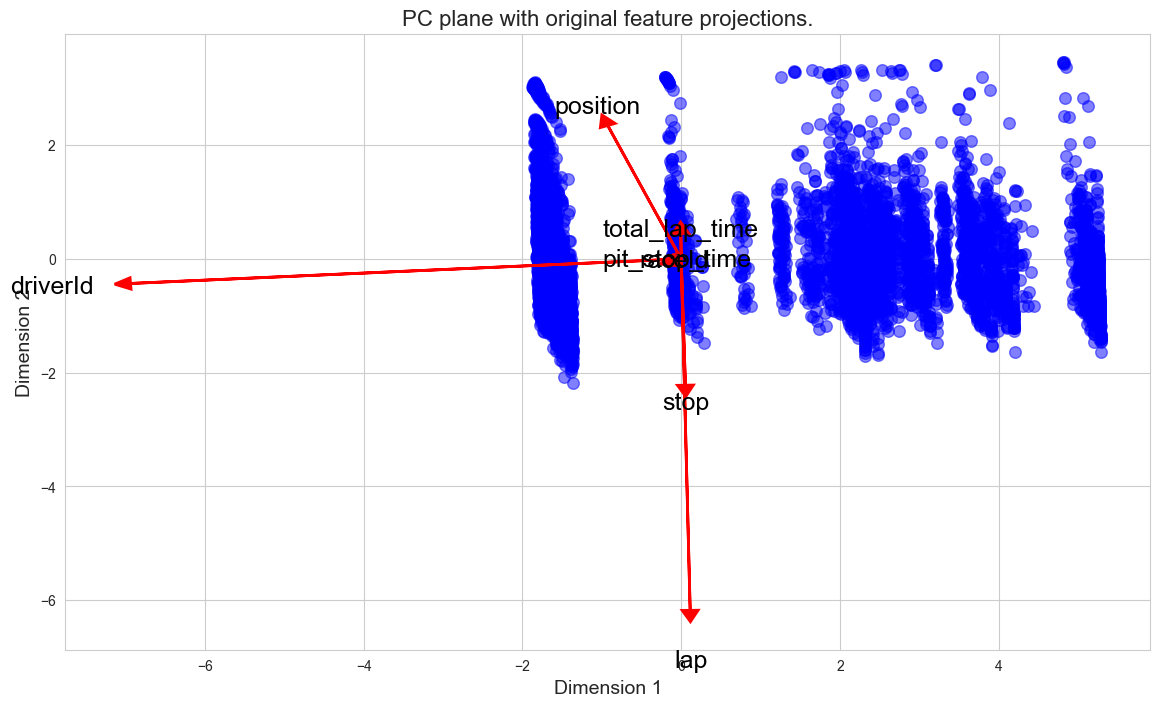

In [34]:
vs.biplot(good_data,reduced_data,pca)

In [35]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [36]:
x = good_data.values
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)


In [37]:
kmeans.cluster_centers_


array([[ 6.83856046,  0.65119803,  0.45659973,  3.11209338, 10.08713589,
         1.10956937, 11.54740458],
       [ 6.88391453,  6.6075771 ,  0.60786102,  3.46533303, 10.14226894,
         2.18953323, 11.53252085],
       [ 6.81640338,  2.63829196,  0.48139889,  3.05282662, 10.0934733 ,
         2.02375893, 11.57052586],
       [ 6.88175567,  6.59216799,  0.08354088,  2.11154872, 10.09641689,
         2.31531788, 11.61968523]])

In [38]:
sh_score = silhouette_score(x,y_kmeans)
print(f"Silhouette Score: {sh_score}")

Silhouette Score: 0.3031498282246966


In [39]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(x, y_kmeans)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 11141.918837639005


In [40]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(x, y_kmeans)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.281000182761607


In [41]:
good_data['Clusters'] = y_kmeans

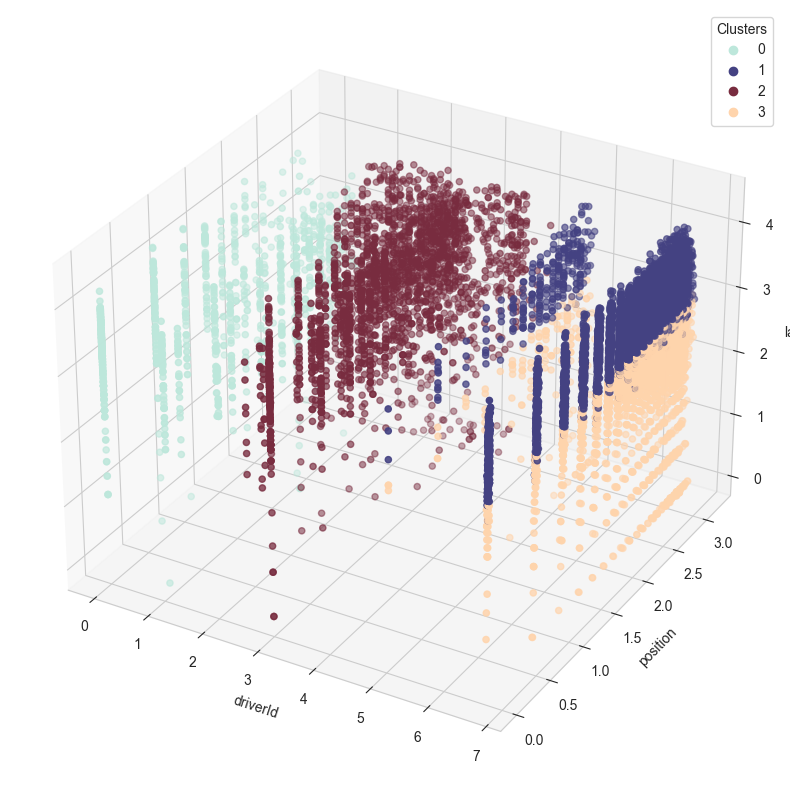

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(good_data['driverId'],good_data['position'],good_data['lap'],c=good_data['Clusters'],cmap='icefire')
ax.set_xlabel('driverId')
ax.set_ylabel('position')
ax.set_zlabel('lap')

labels = np.unique(good_data['Clusters'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(label))) for label in labels]
ax.legend(handles, labels, title='Clusters')

plt.show()


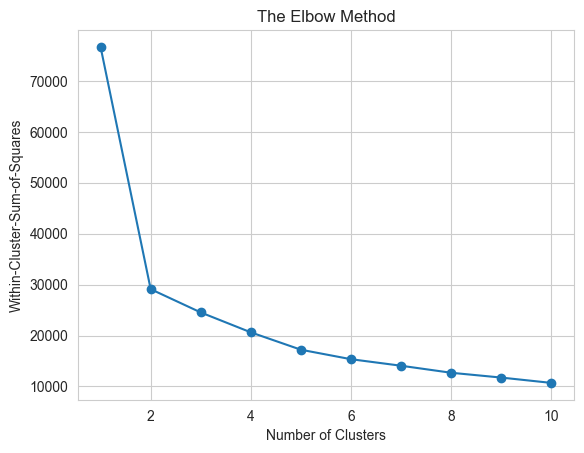

In [43]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(log_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares");

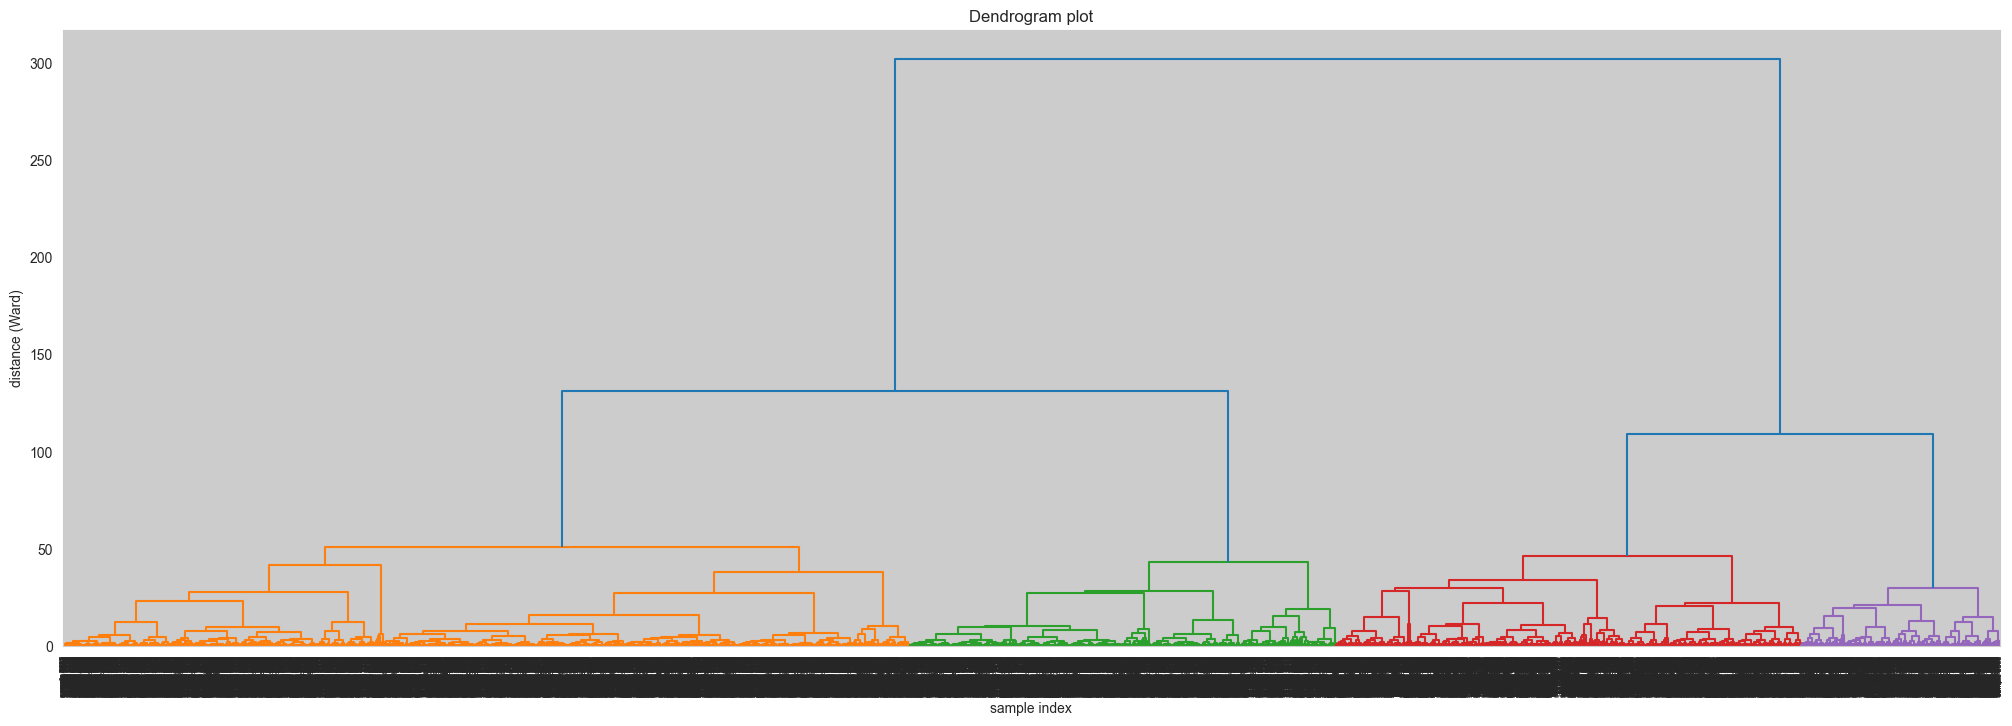

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(good_data, 'ward')

plt.figure(figsize=(25, 8))

labels = [f'sample {i}' for i in range(good_data.shape[0])]

dendrogram(
    linked,
    color_threshold=100,  
    labels=labels,
    orientation='top',  
    distance_sort='descending',
    show_leaf_counts=True  
)

plt.title('Dendrogram plot')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
plt.show()

### there are only 3 clusters

# DBSCAN

In [45]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

In [46]:
data = good_data.to_numpy()  
data.shape

(9559, 8)

# lets samples a few DBSCAM parameters  

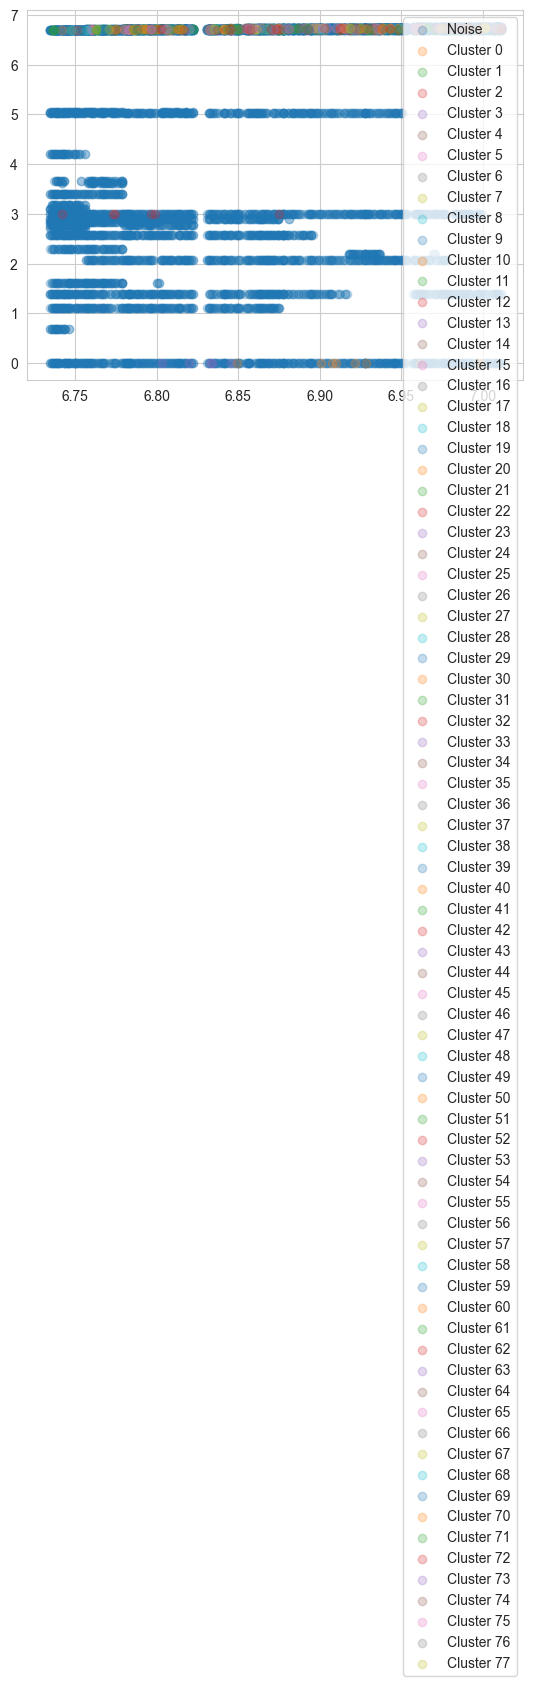

In [49]:
dbscan_model = DBSCAN(eps=0.1, min_samples=5)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1: 
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.25)
    
plt.legend() 
plt.show()

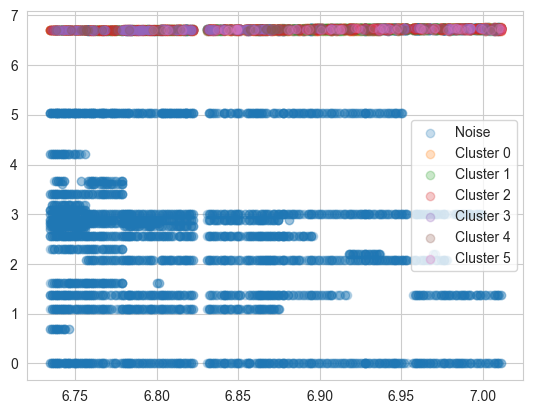

In [50]:
data = good_data.to_numpy()  
dbscan_model = DBSCAN(eps=0.25, min_samples=30)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1:  # handling noise (outlier) cluster
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.25)
    
plt.legend() 
plt.show()

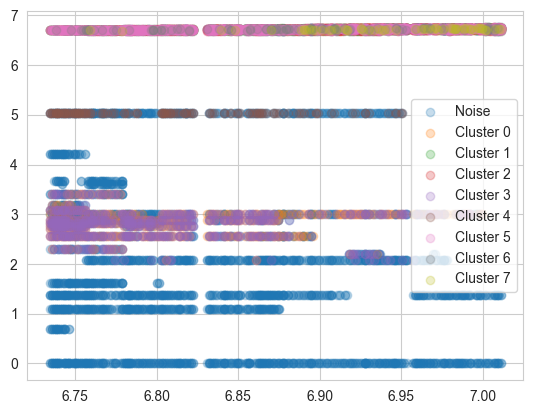

In [51]:
data = good_data.to_numpy()  
dbscan_model = DBSCAN(eps=0.5, min_samples=60)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1:  # handling noise (outlier) cluster
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.25)
    
plt.legend() 
plt.show()

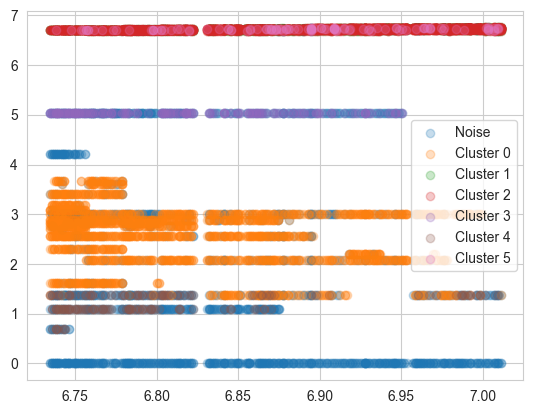

In [52]:
data = good_data.to_numpy()  
dbscan_model = DBSCAN(eps=0.7, min_samples=100)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1:  # handling noise (outlier) cluster
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.25)
    
plt.legend() 
plt.show()

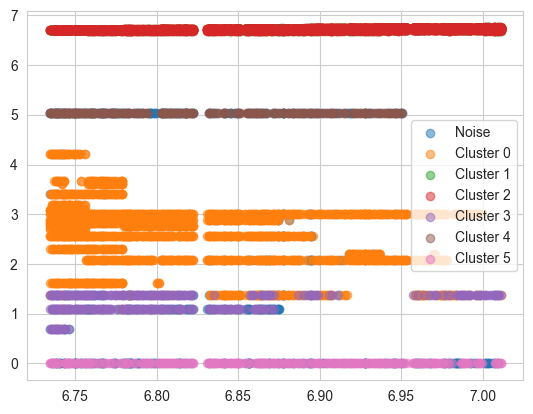

In [53]:
data = good_data.to_numpy()  
dbscan_model = DBSCAN(eps=0.9, min_samples=150)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1:  # handling noise (outlier) cluster
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.5)
    
plt.legend() 
plt.show()

# the best result that we got is eps=0.9, min_samples=150
## we got the total of 6 clusters with DBSCAN

### now we want to make it more general so we want that everydriver will know what are the best feathears from him in order to win in the circuts so we will drop the driverID column and see how it will affect the clusters

In [54]:
final = good_data.drop(['driverId','Clusters'],axis=1)

In [55]:
pca = PCA(n_components=5).fit(final)
pca_samples = pca.transform(final)

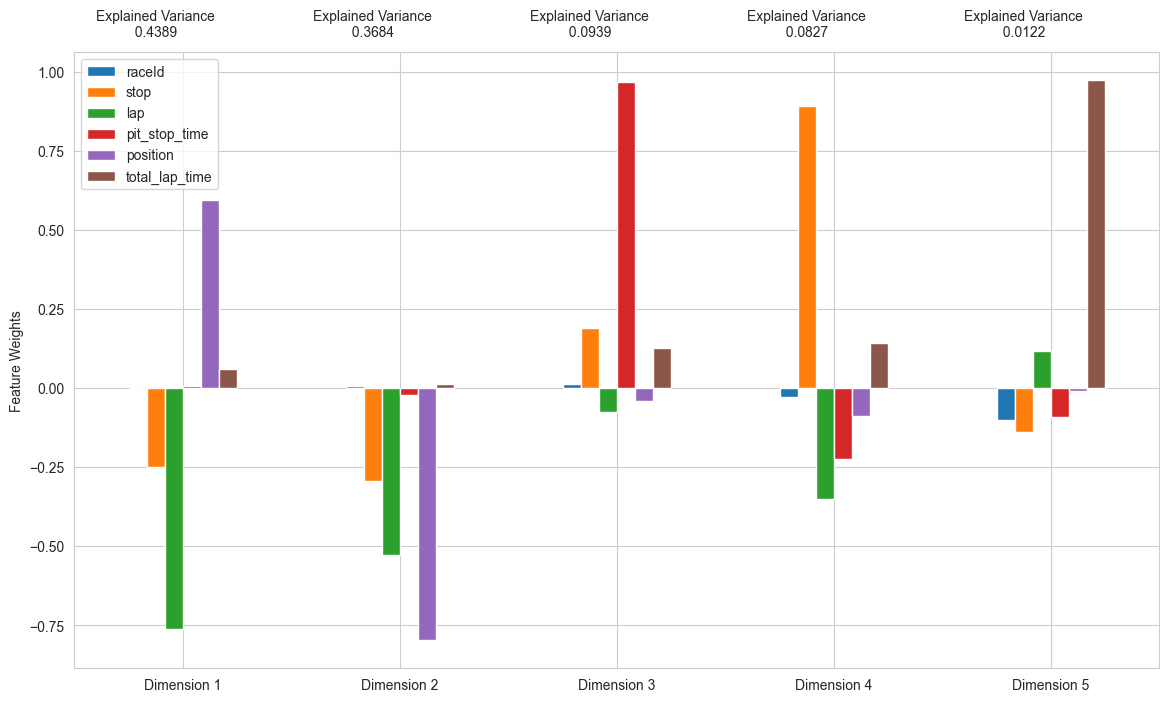

In [56]:
import visuals as vs
pca_results = vs.pca_results(final,pca)

# now we can see that what make the most difference is the posotion, lap num and how many stops he made

In [57]:
log_data.drop(['driverId'],axis=1,inplace=True)

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

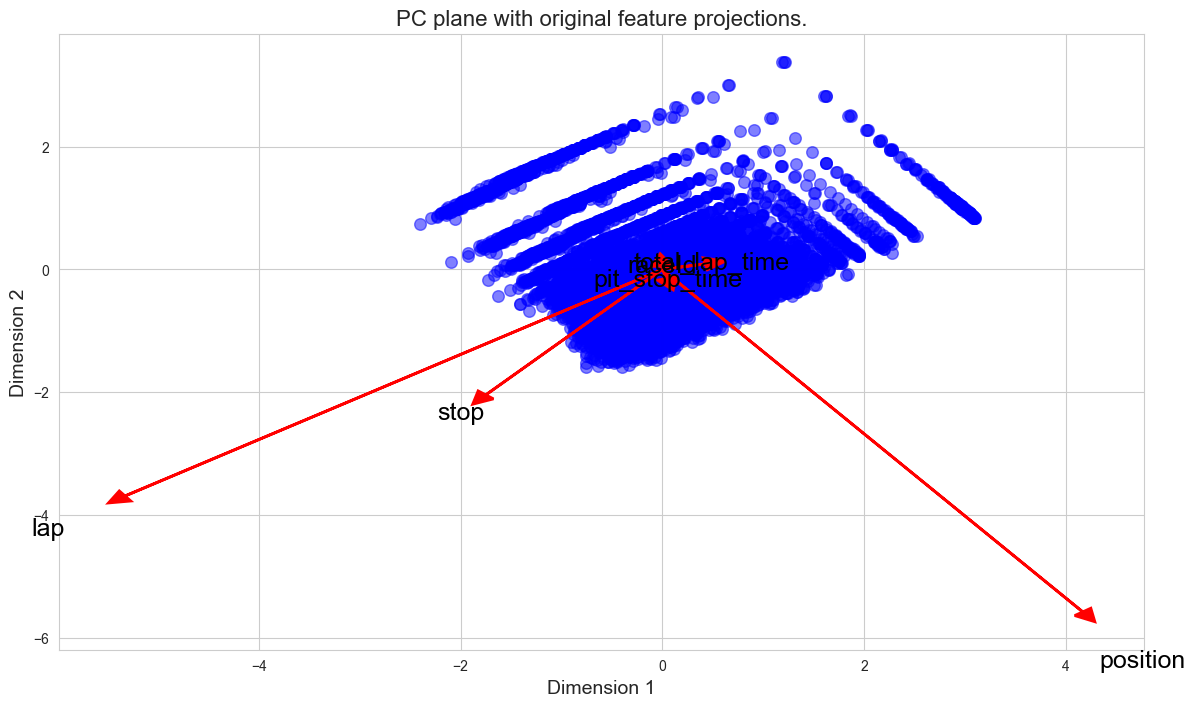

In [58]:
reduced_data = pca.transform(final)
pca_samples = pca.transform(log_data)
reduced_data = pd.DataFrame(reduced_data,columns=['Dimension 1','Dimension 2','Dimension 3','Dimension 4','Dimension 5'])
vs.biplot(final,reduced_data,pca)

In [59]:
x = final.values
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [60]:
kmeans.cluster_centers_

array([[ 6.85465285,  0.83482178,  3.57019365, 10.13256239,  2.43380915,
        11.55544434],
       [ 6.86504005,  0.05735892,  2.68725609, 10.10496353,  2.40004582,
        11.55543219],
       [ 6.88064466,  0.21254717,  0.80645764, 10.09275627,  2.4849229 ,
        11.77676405],
       [ 6.86809011,  0.39537926,  3.19738628, 10.10355885,  0.78999058,
        11.52567359]])

In [61]:
final['Clusters'] = y_kmeans

In [62]:
sh_score = silhouette_score(x,y_kmeans)
print(f"Silhouette Score: {sh_score}")

Silhouette Score: 0.334836667641045


In [63]:
ch_score = calinski_harabasz_score(x, y_kmeans)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 4743.510130526746


In [64]:
db_score = davies_bouldin_score(x, y_kmeans)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 0.9884694649701959


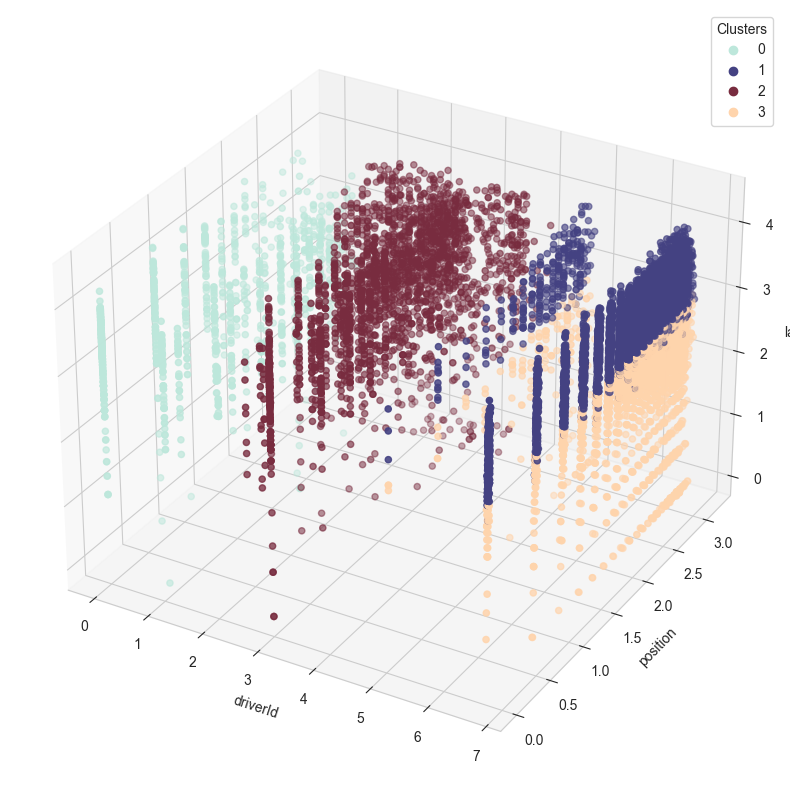

In [65]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(good_data['driverId'],good_data['position'],good_data['lap'],c=good_data['Clusters'],cmap='icefire')
ax.set_xlabel('driverId')
ax.set_ylabel('position')
ax.set_zlabel('lap')

labels = np.unique(good_data['Clusters'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(label))) for label in labels]
ax.legend(handles, labels, title='Clusters')

plt.show()


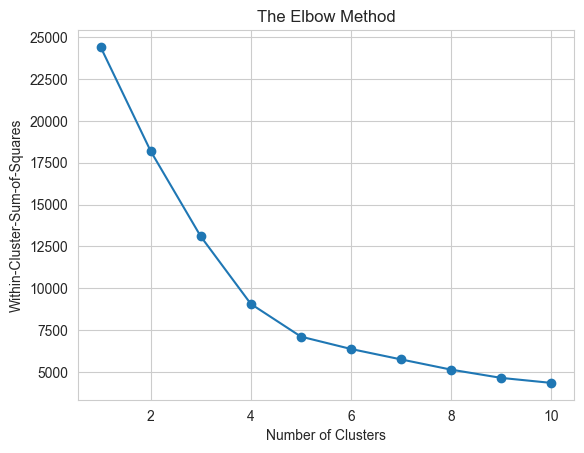

In [66]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(log_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares");

# here we can see that the elbow can be 5

In [67]:
final.drop(['Clusters'],axis=1,inplace=True)

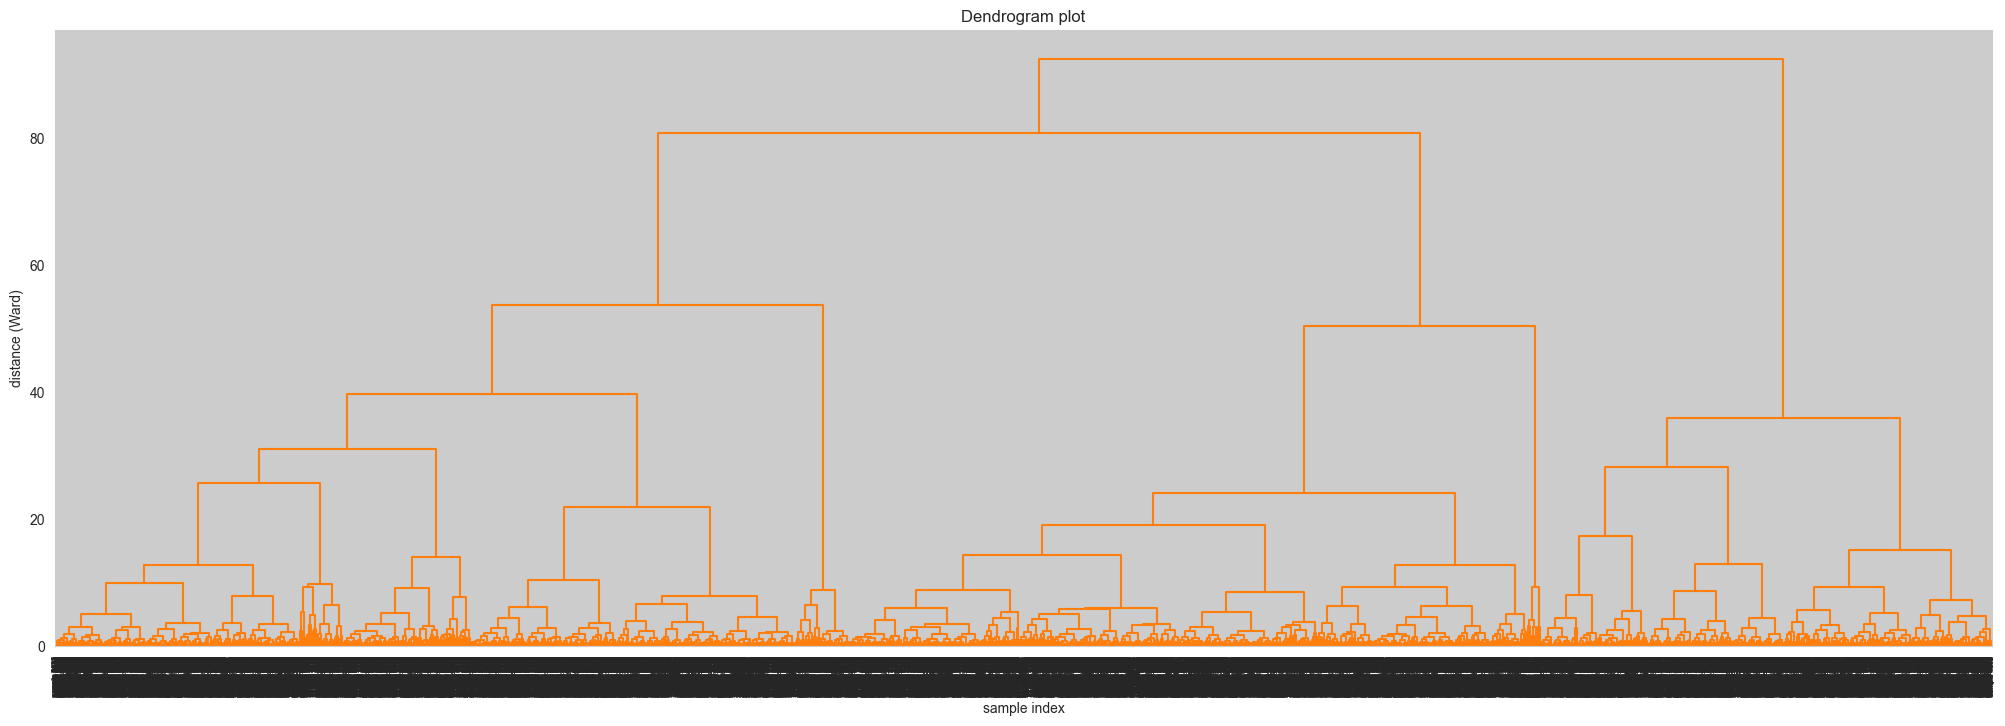

In [68]:
linked = linkage(final, 'ward')

plt.figure(figsize=(25, 8))

labels = [f'sample {i}' for i in range(final.shape[0])]

dendrogram(
    linked,
    color_threshold=100,  
    labels=labels,
    orientation='top',  
    distance_sort='descending',
    show_leaf_counts=True  
)

plt.title('Dendrogram plot')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
plt.show()

# here we can see that the best number of clusters is 4

In [69]:
data = final.to_numpy()  
data.shape

(9559, 6)

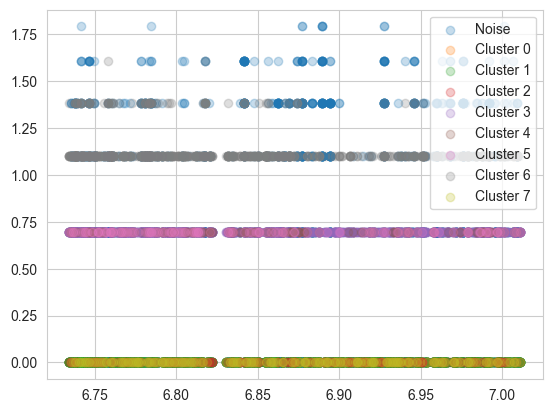

In [70]:
dbscan_model = DBSCAN(eps=0.3, min_samples=60)

dbscan_model.fit(data)
dbscan_labels = dbscan_model.labels_

dbscan_clusters = unique(dbscan_labels)

for cluster in dbscan_clusters:
    index = where(dbscan_labels == cluster)
    if cluster == -1: 
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    plt.scatter(data[index, 0], data[index, 1], label=label, alpha=0.25)
    
plt.legend() 
plt.show()